## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

dataset = pd.merge(mouse_metadata, study_results, on ="Mouse ID" , how = "outer")
dataset.head()


1893

In [2]:
# Checking the number of mice in the DataFrame.
mice = dataset["Mouse ID"]
len(mice)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
miceu = dataset["Mouse ID"].unique()

In [4]:
# Checking the number of mice in the clean DataFrame.
len(miceu)

249

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen = dataset.groupby(["Drug Regimen"])
rmean = regimen["Tumor Volume (mm3)"].mean()
rmedian = regimen["Tumor Volume (mm3)"].median()
rvar = regimen["Tumor Volume (mm3)"].var()
rsd =  regimen["Tumor Volume (mm3)"].std()
ssem = regimen["Tumor Volume (mm3)"].sem()
rcount = regimen["Mouse ID"].count()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame ({"Mean": rmean, "Median": rmedian, "Variance": rvar, "Standard Deviation": rsd, "SEM": ssem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

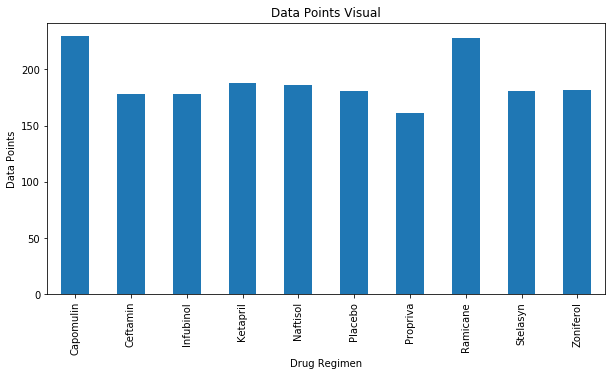

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

rcount = regimen["Mouse ID"].count()
rcount.plot(kind="bar", figsize=(10,5))

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

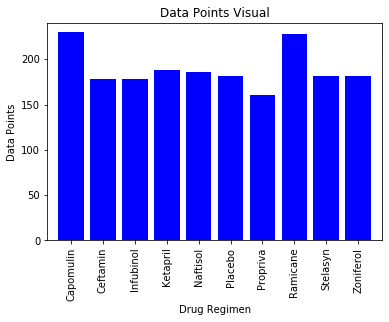

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drugs = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(rcount))
plt.bar(x_axis, drugs, color='b', alpha=1, align='center')
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drugs)+10)
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")



## Pie Plots

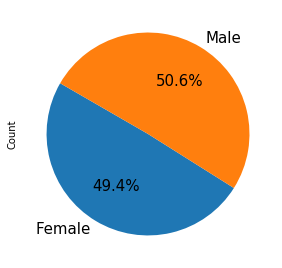

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(dataset.groupby(["Sex"]).count()).reset_index()
gender = gender [["Sex","Mouse ID"]]
gender = gender.rename(columns={"Mouse ID": "Count"})

plt.figure(figsize=(10,6))
pie = plt.subplot(121, aspect='equal')
gender.plot(kind='pie', y = "Count", ax=pie, autopct='%1.1f%%', 
 startangle=150, shadow=False, labels=gender['Sex'], legend = False, fontsize=15)


([<matplotlib.patches.Wedge at 0x1a1a7fc550>,
 [Text(-0.7228233327952772, -0.8291721350640819, 'Female'),
  Text(0.7228233327952773, 0.8291721350640819, 'Male')],
 [Text(-0.3942672724337875, -0.4522757100349537, '49.4%'),
  Text(0.39426727243378756, 0.4522757100349537, '50.6%')])

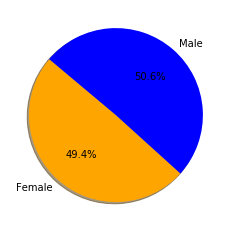

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female","Male"]
percent = [49.4,50.6]
colors = ['orange', 'blue']
plt.pie(percent, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top4 = dataset[dataset["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top4a = top4.sort_values(["Timepoint"], ascending=True)
top4b = top4a[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

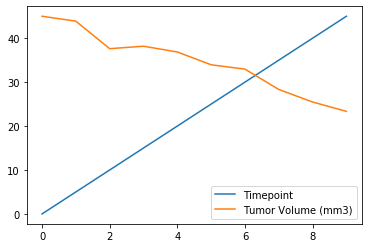

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Tumor = dataset[dataset["Mouse ID"].isin(["s185"])]
Tumord = Tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Index = Tumord.reset_index()
line = Index[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
plot = line.plot.line()

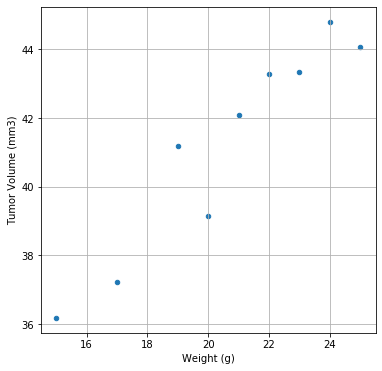

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
sp = dataset[dataset["Drug Regimen"].isin(["Capomulin"])]
sp_df = top4a[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
sp_plot = sp.reset_index()
sp_sorted = sp_plot.sort_values(["Weight (g)"], ascending=True)

group_w = sp_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
sp_group = pd.DataFrame(group_w).reset_index()

sp_plot = sp_group.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (6,6))


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [17]:
sp['Weight (g)'].corr(sp['Tumor Volume (mm3)'])

0.5256995552077166